## Theory :

#### 1 Explain the concept of batch normalization in the context of Artificial Neural Networks ?

   - Normalization : Normlization is a pre-processing tool used to bring a numerical data into a common scale without distorting it's scale.
    
    Batch Normalization is a process to make neural network faster and more stable by adding extra layers in deep neural network.
    The new layer performs the Standardizing or Scaling operation on the input coming from previous layer.

    Typically a neural network is trained on a collection set of input data is called the Batch. Similarly the Batch Normalization Process is performed on batches .

    Normalization is a process of converting our input distribution in such a way that it's mean will become zero and standard deviation becomes 1.
    Normally the output of Hiddden layers are Normalized. 




#### 2. Describe the benefits of using batch normalization during training ?

 Benefits of Batch Normalization :
   1. It Speeds up the training process : By normalizing the hidden layers input , then it is easier for computation for the next layer.In this way the computation speed increases.

   2. Internal Covarient Shift : According to Reseracher's , the Batch Normalization does not solve the problem of Internal Covarient shift.

   3. Stability : It incrases the Stability of model.
   
   4. Smoothens the Loss Function :  Batch Normalization smoothens the loss function by optimizing the model parameters improves training speed of a model.

### 3.Discuss the working principle of batch normalization, including the normalization step and the learnable parameters.

##### Batch Normalization works in two steps :
   1. Normalization step
   2. Learnable Parameters

##### 1. Normalization Step :

For a given layer, the following steps are performed on a Batch in Normalization Step :
1. Calculate mean and variance :  The variance and mean is calculated  using the Mini Batch data.
2. Normalize : Now normalize the batch data by subtracting from mean and then dividing by the standard deviation.

##### 2. Scaling and Shifting(Learnable Parameters) :

To reintroduce the the models ability to learn different scales we add the two parameters to the Normalized outputs which are learnable (γ and β).
Now the formula becomes :

   y = γ * ( X_normalized ) + β

   where γ , β are the hyperparameters which are learnable .



### Implementation

##### 1. Data Collection

In [1]:
from tensorflow.keras.datasets.mnist import load_data

In [2]:
(X_train_full,y_train_full),(X_test,y_test)=load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 731c5ac602752760c8e48fbffcf8c3b850d9dc2a2aedcf2cc48468fc17b673d1 so we will re-download the data.
11490434/11490434 [==============================] - 37s 3us/step


##### 2. Preprocess the Data

In [5]:
X_train_full.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
X_train_full=X_train_full/255
X_test=X_test/255

##### 3. Visualizing the some data 

In [6]:
import matplotlib.pyplot as plt

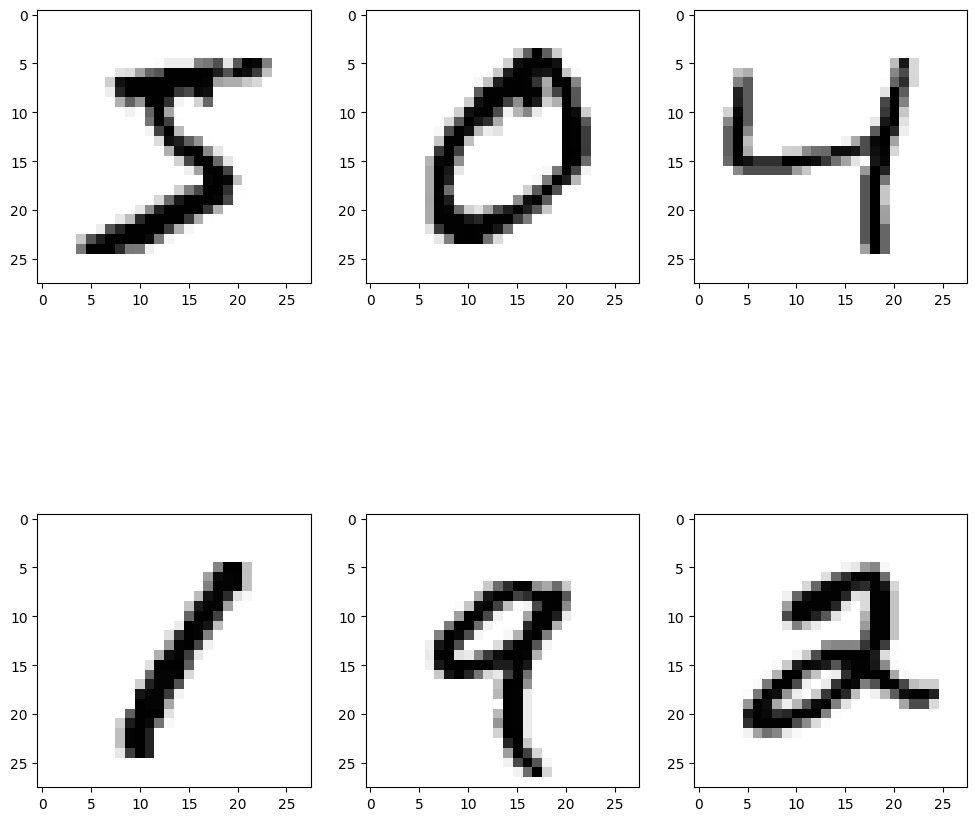

In [13]:
fig=plt.figure(figsize=(12,12))
for i in range(6):
    ax=plt.subplot(2,3,i+1)
    ax.imshow(X_train_full[i],cmap='binary')

##### 4. Splitting training data into training and validation data

In [14]:
X_valid,X_train=X_train_full[:5000],X_train_full[5000:]
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

##### 5. Building and Training a Model without Batch Normalization

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten, BatchNormalization


In [29]:
## Defining a model
model=Sequential()

In [30]:
## Adding layers
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 300)               235500    
                                                                 
 dense_8 (Dense)             (None, 100)               30100     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [32]:
## Compiling a model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
## Training a model
model.fit(X_train,y_train,epochs=8,verbose=1,validation_data=(X_valid,y_valid))

Epoch 1/8


1719/1719 [==============================] - 11s 6ms/step - loss: 1.5155 - accuracy: 0.8472 - val_loss: 0.4016 - val_accuracy: 0.9060
Epoch 2/8
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3424 - accuracy: 0.9138 - val_loss: 0.3197 - val_accuracy: 0.9268
Epoch 3/8
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2236 - accuracy: 0.9406 - val_loss: 0.2588 - val_accuracy: 0.9432
Epoch 4/8
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1806 - accuracy: 0.9535 - val_loss: 0.1818 - val_accuracy: 0.9552
Epoch 5/8
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1505 - accuracy: 0.9609 - val_loss: 0.1625 - val_accuracy: 0.9634
Epoch 6/8
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1273 - accuracy: 0.9669 - val_loss: 0.1283 - val_accuracy: 0.9684
Epoch 7/8
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1195 - accuracy: 0.9697 - val_loss: 0.1531 - val_accuracy: 0.9664
Epoch 8

In [34]:
### Evaluating the Model 
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1741 - accuracy: 0.9633


[0.17406995594501495, 0.9632999897003174]

##### 6. Building and Training a model with Batch Normalization

In [35]:
## Defining a model
model_1=Sequential()

In [36]:
## Adding layers
model_1.add(Flatten(input_shape=(28,28)))
model_1.add(Dense(300,activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dense(100,activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dense(10,activation='softmax'))

In [38]:
## Compiling a model
model_1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Training a model
model_1.fit(X_train,y_train,epochs=8,verbose=1,validation_data=(X_valid,y_valid))

Epoch 1/8
1719/1719 [==============================] - 13s 7ms/step - loss: 0.2229 - accuracy: 0.9325 - val_loss: 0.1211 - val_accuracy: 0.9658
Epoch 2/8
1719/1719 [==============================] - 11s 7ms/step - loss: 0.1123 - accuracy: 0.9650 - val_loss: 0.1283 - val_accuracy: 0.9692
Epoch 3/8
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0864 - accuracy: 0.9723 - val_loss: 0.1300 - val_accuracy: 0.9772
Epoch 4/8
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0689 - accuracy: 0.9778 - val_loss: 0.1765 - val_accuracy: 0.9762
Epoch 5/8
1719/1719 [==============================] - 13s 7ms/step - loss: 0.0595 - accuracy: 0.9803 - val_loss: 0.1015 - val_accuracy: 0.9764
Epoch 6/8
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0498 - accuracy: 0.9837 - val_loss: 0.1229 - val_accuracy: 0.9764
Epoch 7/8
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0431 - accuracy: 0.9855 - val_loss: 0.1473 - val_accuracy:

In [39]:
## Evaluate the Model
model_1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1017 - accuracy: 0.9759


[0.1017298698425293, 0.9758999943733215]

##### 7. Now testing the Batch Normalization on Different Batch Sizes 

    

Batch_size=64

In [41]:
## Defining a model
model_1=Sequential()

## Adding layers
model_1.add(Flatten(input_shape=(28,28)))
model_1.add(Dense(300,activation='relu'))

## Adding batch Normalization for Hidden Layer 1
model_1.add(BatchNormalization())
model_1.add(Dense(100,activation='relu'))

## Adding batch Normalization for Hidden Layer 2
model_1.add(BatchNormalization())
model_1.add(Dense(10,activation='softmax'))

## Compiling a model
model_1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Training a model
model_1.fit(X_train,y_train,epochs=8,verbose=1,validation_data=(X_valid,y_valid),batch_size=64)

Epoch 1/8
860/860 [==============================] - 8s 7ms/step - loss: 0.2073 - accuracy: 0.9387 - val_loss: 0.1077 - val_accuracy: 0.9660
Epoch 2/8
860/860 [==============================] - 7s 8ms/step - loss: 0.0899 - accuracy: 0.9724 - val_loss: 0.0925 - val_accuracy: 0.9722
Epoch 3/8
860/860 [==============================] - 6s 7ms/step - loss: 0.0642 - accuracy: 0.9793 - val_loss: 0.0851 - val_accuracy: 0.9732
Epoch 4/8
860/860 [==============================] - 6s 7ms/step - loss: 0.0505 - accuracy: 0.9836 - val_loss: 0.0804 - val_accuracy: 0.9766
Epoch 5/8
860/860 [==============================] - 6s 7ms/step - loss: 0.0436 - accuracy: 0.9865 - val_loss: 0.0860 - val_accuracy: 0.9774
Epoch 6/8
860/860 [==============================] - 6s 7ms/step - loss: 0.0340 - accuracy: 0.9887 - val_loss: 0.0869 - val_accuracy: 0.9768
Epoch 7/8
860/860 [==============================] - 6s 7ms/step - loss: 0.0306 - accuracy: 0.9897 - val_loss: 0.0845 - val_accuracy: 0.9776
Epoch 8/8
860

In [43]:
model_1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0712 - accuracy: 0.9802


[0.07124219089746475, 0.9801999926567078]

Batch size=100

In [44]:
## Defining a model
model_2=Sequential()

## Adding layers
model_2.add(Flatten(input_shape=(28,28)))
model_2.add(Dense(300,activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dense(100,activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dense(10,activation='softmax'))

## Compiling a model
model_2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Training a model
model_2.fit(X_train,y_train,epochs=8,verbose=1,validation_data=(X_valid,y_valid),batch_size=100)

Epoch 1/8
550/550 [==============================] - 6s 9ms/step - loss: 0.2085 - accuracy: 0.9374 - val_loss: 0.1070 - val_accuracy: 0.9704
Epoch 2/8
550/550 [==============================] - 4s 8ms/step - loss: 0.0849 - accuracy: 0.9737 - val_loss: 0.0770 - val_accuracy: 0.9768
Epoch 3/8
550/550 [==============================] - 4s 8ms/step - loss: 0.0557 - accuracy: 0.9821 - val_loss: 0.0890 - val_accuracy: 0.9756
Epoch 4/8
550/550 [==============================] - 5s 9ms/step - loss: 0.0405 - accuracy: 0.9871 - val_loss: 0.0902 - val_accuracy: 0.9786
Epoch 5/8
550/550 [==============================] - 5s 9ms/step - loss: 0.0325 - accuracy: 0.9899 - val_loss: 0.0911 - val_accuracy: 0.9764
Epoch 6/8
550/550 [==============================] - 4s 8ms/step - loss: 0.0274 - accuracy: 0.9910 - val_loss: 0.0761 - val_accuracy: 0.9780
Epoch 7/8
550/550 [==============================] - 4s 8ms/step - loss: 0.0232 - accuracy: 0.9923 - val_loss: 0.0782 - val_accuracy: 0.9798
Epoch 8/8
550

In [45]:
model_2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0943 - accuracy: 0.9748


[0.09432993084192276, 0.9747999906539917]